In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
def choose():
    randval = np.random.uniform(0,1)
    if randval <= 3/6:
        return 'r'
    if 3/6 < randval <= 5/6:
        return 'b'
    if 5/6 < randval <= 6/6:
        return 'g'

In [3]:
def getratio(N):
    res = np.random.choice(['r','b','g'], size=N, p=[3/6,2/6,1/6])

    rs = np.count_nonzero(res=='r')
    bs = np.count_nonzero(res=='b')
    gs = np.count_nonzero(res=='g')

    normconst = float(np.max([rs,gs,bs]))

    rs = rs/normconst
    bs = bs/normconst
    gs = gs/normconst
    return rs,bs,gs

In [4]:
N=200

ratios = []
for i in range(1000): #do this 1000 times
    ratio = getratio(N)
    ratios.append(ratio)
ratios = np.asarray(ratios)

In [5]:
red_upper = np.percentile(ratios.T[0],97.5)
red_lower = np.percentile(ratios.T[0],2.5)

blue_upper = np.percentile(ratios.T[1],97.5)
blue_lower = np.percentile(ratios.T[1],2.5)

green_upper = np.percentile(ratios.T[2],97.5)
green_lower = np.percentile(ratios.T[2],2.5)

print(red_upper,red_lower)
print(blue_upper,blue_lower)
print(green_upper,green_lower)

1.0 1.0
0.9080976365749709 0.48671348542664605
0.476757399577167 0.21778164302916778


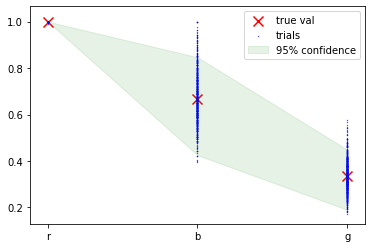

In [11]:
x = ['r','b','g']
errs = np.asarray([(red_upper-1,blue_upper-2/3,green_upper-1/3),(1-red_lower,2/3-blue_lower,1/3-green_lower)])
y = np.asarray([1,2/3,1/3])

plt.scatter(x,y,c='r',s=100,zorder=0,marker='x',label='true val')

for ratio in ratios:
    plt.scatter(x,ratio,c='b',s=0.1,label='trials')

#plt.errorbar(['r','b','g'],y,yerr=errs,fmt='.',c='g',zorder=3)
plt.fill_between(['r','b','g'], y-errs[0], y+errs[1],color='g',alpha=0.1,label='95% confidence')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.savefig('./imgs/experiment0.png',dpi=300)


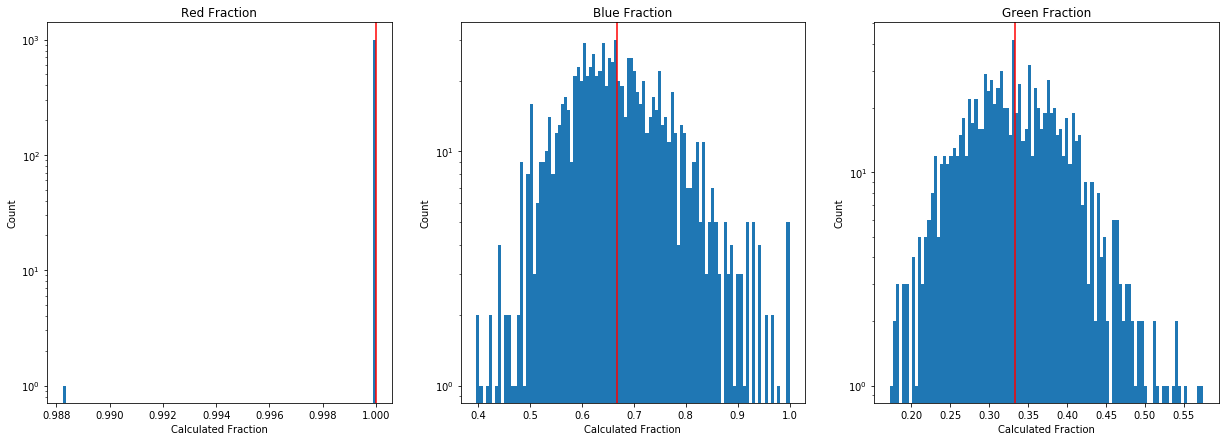

In [9]:
binz=100

fig,ax = plt.subplots(ncols=3,figsize=(21,7))
ax[0].hist(ratios.T[0],bins=binz)
ax[0].axvline(1.0,c='r')
ax[0].set_title("Red Fraction")
ax[0].set_xlabel('Calculated Fraction')
ax[0].set_ylabel('Count')
ax[0].set_yscale('log')

ax[1].hist(ratios.T[1],bins=binz)
ax[1].axvline(2/3,c='r')
ax[1].set_title("Blue Fraction")
ax[1].set_xlabel('Calculated Fraction')
ax[1].set_ylabel('Count')
ax[1].set_yscale('log')


ax[2].hist(ratios.T[2],bins=binz)
ax[2].axvline(1/3,c='r')
ax[2].set_title("Green Fraction")
ax[2].set_xlabel('Calculated Fraction')
ax[2].set_ylabel('Count')
ax[2].set_yscale('log')

plt.savefig('./imgs/experiment1.png',dpi=300)


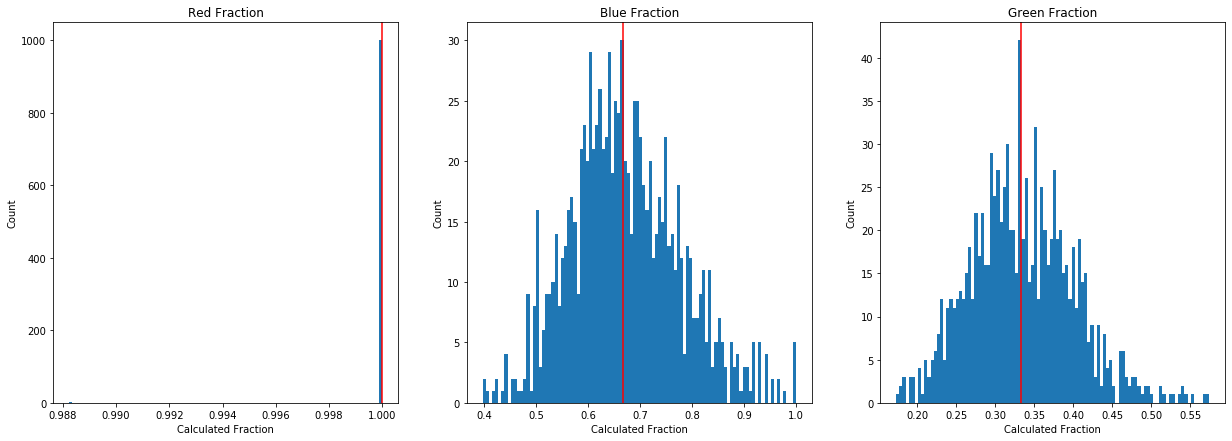

In [10]:
binz=100

fig,ax = plt.subplots(ncols=3,figsize=(21,7))
ax[0].hist(ratios.T[0],bins=binz)
ax[0].axvline(1.0,c='r')
ax[0].set_title("Red Fraction")
ax[0].set_xlabel('Calculated Fraction')
ax[0].set_ylabel('Count')

ax[1].hist(ratios.T[1],bins=binz)
ax[1].axvline(2/3,c='r')
ax[1].set_title("Blue Fraction")
ax[1].set_xlabel('Calculated Fraction')
ax[1].set_ylabel('Count')

ax[2].hist(ratios.T[2],bins=binz)
ax[2].axvline(1/3,c='r')
ax[2].set_title("Green Fraction")
ax[2].set_xlabel('Calculated Fraction')
ax[2].set_ylabel('Count')

plt.savefig('./imgs/experiment2.png',dpi=300)